In [1]:
import matplotlib
# no type 3 fonts
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
from sympy import *
import numpy as np

s= symbols('s')
l= symbols('l')
y= symbols('y')

In [3]:
integrand = y**l * (1-y)**(s-l) * gamma(s+1)/(gamma(1+s-l) * gamma(1+l))
integ = Integral(integrand, (l,-1/2, s+1/2))
#integ = Integral(integrand, (l,0, s))
integ

Integral(y**l*(1 - y)**(-l + s)*gamma(s + 1)/(gamma(l + 1)*gamma(-l + s + 1)), (l, -0.5, s + 0.5))

In [4]:
v_int = np.vectorize(lambda ss,yy: integ.subs(s,ss).subs(y,yy).evalf())

In [5]:
# Make data.
#S = np.arange(0., 31, .5)
#Y = np.arange(0.01, 1., .01)
S = np.arange(0., 100., 1.)
Y = np.arange(0.01, 1., .01)
S, Y = np.meshgrid(S, Y)

Z = v_int(S,Y)

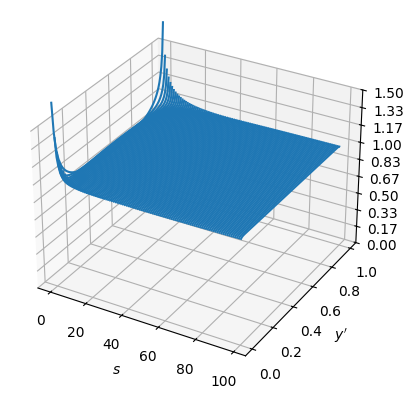

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})



# Plot the surface.
#surf = ax.plot_surface(S, Y, Z, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

ax.plot_wireframe(S, Y, Z, rstride=0, cstride=1)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_zlim(0., 1.5)

plt.xlabel("$s$")
plt.ylabel("$y'$")
plt.show()
plt.savefig("continuous_binomial.pdf", bbox_inches='tight')
plt.close()


In [7]:
integ.subs(s,102.7).subs(y,.1).evalf()

0.999999527572920

In [8]:
lambd= symbols('lambda')

integ2 = Integral(lambd * exp(-lambd*s) * integ , (s,0,oo))
integ2



Integral(lambda*exp(-lambda*s)*Integral(y**l*(1 - y)**(-l + s)*gamma(s + 1)/(gamma(l + 1)*gamma(-l + s + 1)), (l, -0.5, s + 0.5)), (s, 0, oo))

In [9]:
integ2.subs(lambd,100).subs(y,.1).evalf()

Integral(100*exp(-100*s)*Integral(0.1**l*0.9**(-l + s)*gamma(s + 1)/(gamma(l + 1)*gamma(-l + s + 1)), (l, -0.5, s + 0.5)), (s, 0, oo))

In [10]:
##### VERSION MAS SIMPLE

#integrand = y**l * (1-y)**(s-l) * gamma(s)/(gamma(s-l) * gamma(l))
integrand = y**l * (1-y)**(s-l) * gamma(s+1)/(gamma(s-l+1) * gamma(l+1))

#integ = Integral(integrand, (l,-1/2, s+1/2))
integ = Integral(integrand, (l,0, s))
integ

Integral(y**l*(1 - y)**(-l + s)*gamma(s + 1)/(gamma(l + 1)*gamma(-l + s + 1)), (l, 0, s))

In [11]:
v_int = np.vectorize(lambda ss,yy: integ.subs(s,ss).subs(y,yy).evalf())

In [12]:
# Make data.
#S = np.arange(0., 31, .5)
#Y = np.arange(0.01, 1., .01)
S = np.arange(0., 200., 1.)
Y = np.arange(0.01, 1., .01)
S, Y = np.meshgrid(S, Y)

Z = v_int(S,Y)

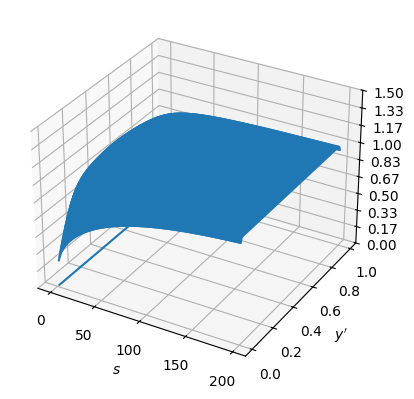

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})



# Plot the surface.
#surf = ax.plot_surface(S, Y, Z, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

ax.plot_wireframe(S, Y, Z, rstride=0, cstride=1)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_zlim(0., 1.5)

plt.xlabel("$s$")
plt.ylabel("$y'$")
plt.show()
plt.savefig("continuous_binomial_simplest0.pdf", bbox_inches='tight')
plt.close()